In [ ]:
from helper_functions import *
import pathlib
import numpy as np
import os

In [ ]:
!pip install opendatasets pandas
import opendatasets as od
od.download("https://www.kaggle.com/datasets/vishalmane109/indian-currency-note-images-dataset-2020")

100%|██████████| 2.31G/2.31G [00:26<00:00, 93.8MB/s]


In [ ]:
# zip_ref = zipfile.ZipFile("Thai_and_Indian_Currency_Dataset256x256")
# zip_ref.extractall()
# zip_ref.close()

In [ ]:
!ls /content/cu/in/test

100_15.jpg    10__388.jpg    200.__206.jpg  20__72.jpg	  50__288.jpg
100_20.jpg    10__443.jpg    200.__225.jpg  20__9.jpg	  50__295.jpg
100_270.jpg   2000__114.jpg  200.__254.jpg  500__0.jpg	  50__338.jpg
100_359.jpg   2000__161.jpg  200.__290.jpg  500__114.jpg  50__345.jpg
100__371.jpg  2000__240.jpg  200.__338.jpg  500__17.jpg   50__366.jpg
100_371.jpg   2000__261.jpg  200.__37.jpg   500__233.jpg  50__408.jpg
100__386.jpg  2000__288.jpg  200.__402.jpg  500__262.jpg  50__442.jpg
100__389.jpg  2000__317.jpg  200.__492.jpg  500__289.jpg  Background__302.jpg
100_3.jpg     2000__359.jpg  200.__87.jpg   500__331.jpg  Background__303.jpg
100__415.jpg  2000__37.jpg   20__107.jpg    500__374.jpg  Background__304.jpg
100__427.jpg  2000__428.jpg  20__136.jpg    500__37.jpg   Background__305.jpg
100__435.jpg  2000__66.jpg   20__226.jpg    500__429.jpg  Background__309.jpg
100__437.jpg  2000__8.jpg    20__295.jpg    500__57.jpg   Background__310.jpg
100_4.jpg     200.__142.jpg  20__324.jpg    50

In [ ]:
!ls /content/cu/in/training/10

10__0.jpg    10__168.jpg  10__235.jpg  10__302.jpg  10__370.jpg  10__438.jpg
10__100.jpg  10__169.jpg  10__236.jpg  10__303.jpg  10__371.jpg  10__439.jpg
10__101.jpg  10__16.jpg   10__237.jpg  10__304.jpg  10__372.jpg  10__43.jpg
10__102.jpg  10__170.jpg  10__238.jpg  10__305.jpg  10__373.jpg  10__440.jpg
10__103.jpg  10__171.jpg  10__239.jpg  10__306.jpg  10__374.jpg  10__441.jpg
10__104.jpg  10__172.jpg  10__23.jpg   10__307.jpg  10__375.jpg  10__442.jpg
10__105.jpg  10__173.jpg  10__240.jpg  10__308.jpg  10__376.jpg  10__443.jpg
10__106.jpg  10__174.jpg  10__241.jpg  10__309.jpg  10__377.jpg  10__444.jpg
10__107.jpg  10__175.jpg  10__242.jpg  10__30.jpg   10__378.jpg  10__445.jpg
10__108.jpg  10__176.jpg  10__243.jpg  10__310.jpg  10__379.jpg  10__446.jpg
10__109.jpg  10__177.jpg  10__244.jpg  10__311.jpg  10__37.jpg	 10__447.jpg
10__10.jpg   10__178.jpg  10__245.jpg  10__312.jpg  10__380.jpg  10__44.jpg
10__110.jpg  10__179.jpg  10__246.jpg  10__313.jpg  10__381.jpg  10__45.jpg
10_

In [ ]:
directory_paths = {
    "num_10": "/content/cu/in/training/10",
    "num_100": "/content/cu/in/training/100",
    "num_20": "/content/cu/in/training/20",
    "num_200": "/content/cu/in/training/200",
    "num_2000": "/content/cu/in/training/2000",
    "num_50": "/content/cu/in/training/50",
    "num_500": "/content/cu/in/training/500",
    "num_background": "/content/cu/in/training/Background"
}

directory_lengths = {}

for name, path in directory_paths.items():
    directory_lengths[name] = len(os.listdir(path))

print(directory_lengths)

for name, length in directory_lengths.items():
    print(name, "is", length)

{'num_10': 448, 'num_100': 450, 'num_20': 450, 'num_200': 500, 'num_2000': 438, 'num_50': 450, 'num_500': 437, 'num_background': 393}
num_10 is 448
num_100 is 450
num_20 is 450
num_200 is 500
num_2000 is 438
num_50 is 450
num_500 is 437
num_background is 393


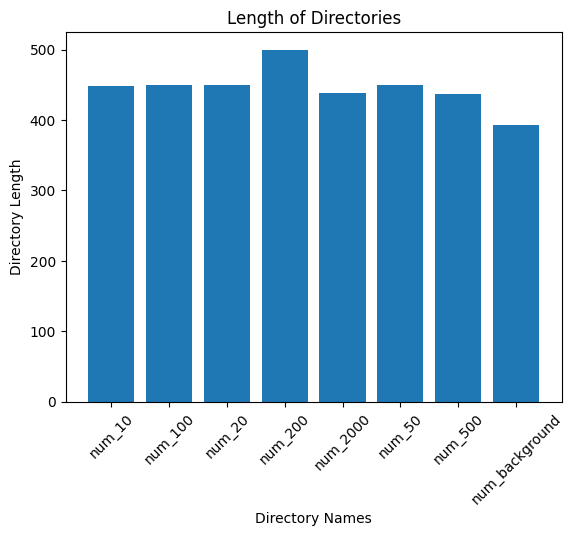

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the 'directory_lengths' dictionary with the lengths of the directories

# Extracting the keys and values from the dictionary
names = list(directory_lengths.keys())
lengths = list(directory_lengths.values())

# Creating a bar graph
plt.bar(names, lengths)

# Adding labels and title
plt.xlabel("Directory Names")
plt.ylabel("Directory Length")
plt.title("Length of Directories")

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the graph
plt.show()

In [ ]:
data_dir = pathlib.Path("/content/cu/in/training")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # this creates a list of class names from the subdirectories
print(class_names)

['10' '100' '20' '200' '2000' '50' '500' 'Background']


In [ ]:
# Lets write code to visualise our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

['10__203.jpg']
Image shape: (960, 1280, 3)


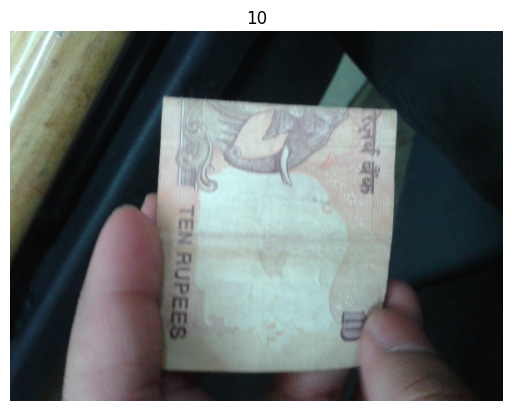

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir = "/content/cu/in/training/",
                        target_class = "10")

In [ ]:
import tensorflow as tf
img_tensor = tf.constant(img)
print(img_tensor , np.max(img_tensor) , np.min(img_tensor))

tf.Tensor(
[[[189 201 189]
  [188 202 189]
  [187 203 190]
  ...
  [ 19  38  34]
  [ 18  34  33]
  [ 19  33  33]]

 [[188 200 186]
  [189 203 188]
  [189 206 190]
  ...
  [ 20  39  35]
  [ 20  36  33]
  [ 22  37  34]]

 [[187 199 185]
  [191 203 189]
  [193 207 192]
  ...
  [ 22  39  33]
  [ 22  37  32]
  [ 22  37  34]]

 ...

 [[ 12  22  34]
  [ 12  22  34]
  [ 12  22  34]
  ...
  [  9   9   9]
  [  8   8   8]
  [  8   8   8]]

 [[ 11  23  35]
  [ 11  23  35]
  [ 14  24  36]
  ...
  [ 11  11  11]
  [ 11  11  11]
  [ 10  10  10]]

 [[ 14  26  38]
  [ 13  25  37]
  [ 16  26  38]
  ...
  [ 13  13  13]
  [ 13  13  13]
  [ 13  13  13]]], shape=(960, 1280, 3), dtype=uint8) 255 1


In [ ]:
# Get all the pixel values between 0 & 1
img_tensor_norm = img_tensor / 255
img_tensor_norm

<tf.Tensor: shape=(960, 1280, 3), dtype=float32, numpy=
array([[[0.7411765 , 0.7882353 , 0.7411765 ],
        [0.7372549 , 0.7921569 , 0.7411765 ],
        [0.73333335, 0.79607844, 0.74509805],
        ...,
        [0.07450981, 0.14901961, 0.13333334],
        [0.07058824, 0.13333334, 0.12941177],
        [0.07450981, 0.12941177, 0.12941177]],

       [[0.7372549 , 0.78431374, 0.7294118 ],
        [0.7411765 , 0.79607844, 0.7372549 ],
        [0.7411765 , 0.80784315, 0.74509805],
        ...,
        [0.07843138, 0.15294118, 0.13725491],
        [0.07843138, 0.14117648, 0.12941177],
        [0.08627451, 0.14509805, 0.13333334]],

       [[0.73333335, 0.78039217, 0.7254902 ],
        [0.7490196 , 0.79607844, 0.7411765 ],
        [0.75686276, 0.8117647 , 0.7529412 ],
        ...,
        [0.08627451, 0.15294118, 0.12941177],
        [0.08627451, 0.14509805, 0.1254902 ],
        [0.08627451, 0.14509805, 0.13333334]],

       ...,

       [[0.04705882, 0.08627451, 0.13333334],
        [0.0

In [ ]:
img_tensor_norm.shape

TensorShape([960, 1280, 3])

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocessing data (scaling / normalization)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# setupp paths to our
train_dir = "/content/cu/in/training"
test_dir = "/content/cu/in/validation"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                          batch_size = 32,
                                          target_size = (224, 224) ,
                                          class_mode = "sparse",
                                          seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                          batch_size = 32,
                                          target_size = (224, 224) ,
                                          class_mode = 'sparse',
                                          seed = 42)



Found 3566 images belonging to 8 classes.
Found 345 images belonging to 8 classes.


In [ ]:
# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 2,
                           activation = 'relu',
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation = 'softmax')
])

# Compie the model
model_1.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Fit the model
history_1 = model_1.fit(train_data, epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5


KeyboardInterrupt: ignored

## Data Augmentation method

In [ ]:
train_dir = "/content/cu/in/training"
test_dir = "/content/cu/in/validation"

train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip = True,
                                             vertical_flip = True)

train_data_augmented = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = 'sparse',
                                                                   shuffle = True,
                                                                   seed = 42)


valid_datagen = ImageDataGenerator(rescale = 1/255.)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                          batch_size = 32,
                                          target_size = (224, 224),
                                          class_mode = 'sparse',
                                          shuffle = True,
                                          seed = 42)

Found 3566 images belonging to 8 classes.
Found 345 images belonging to 8 classes.


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam

# 1. Create the model with data augmentation technique
model_2 = Sequential([
    Conv2D(10, 2, activation = 'relu', input_shape = (224, 224, 3), padding = 'same'),
    Conv2D(10, 2, activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 2, activation = 'relu'),
    Conv2D(10, 2, activation = 'relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(8, activation = 'softmax')
])

# compile the model
model_2.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# fit the model
history_2 = model_2.fit(train_data_augmented, epochs = 7,
                    steps_per_epoch = len(train_data_augmented),
                    validation_data = valid_data,
                    validation_steps = len(valid_data))

Epoch 1/7
  2/112 [..............................] - ETA: 1:18 - loss: 2.3674 - accuracy: 0.2031 

KeyboardInterrupt: ignored

## Feature Extraction technique


In [ ]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"
efficientnet_v2b3_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b3/feature_vector/2"
efficientnet_v2b0_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b0/feature_vector/2"

# import depencencies
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

def create_model(model_url, num_classes = 8):
  """
  Takes a tensorflow hub url and create a keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in the output layer,
                       should be equal to number of target classes, default 10.

  Returns:
    An uncompiled keras Sequential model with model_url as feature extractor
    layer and Dense output layer with num_classes output neurons.
  """
  # Download the model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable = False,
                                           name = "feature_extraction_layer",
                                           input_shape = (224, 224) + (3,)) # Freeze the already learned patterns

  # Create our own model
  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(100, activation = 'relu', name = 'FC1'),
      layers.Dense(100, activation = 'relu', name = 'FC2'),
      layers.Dense(num_classes, activation = 'softmax', name = 'output_layer')
  ])

  return model

# resnet_model = create_model(resnet_url)
# resnet_model.summary()
# resnet_model.compile(
#     loss = 'sparse_categorical_crossentropy',
#     optimizer = Adam(),
#     metrics = ['accuracy']
# )
# resnet_history = resnet_model.fit(train_data_augmented, epochs = 5,
#                                   steps_per_epoch = len(train_data_augmented),
#                                   validation_data = valid_data,
#                                   validation_steps = len(valid_data))

In [ ]:
efficientnet_model = create_model(efficientnet_url)
efficientnet_model.summary()
efficientnet_model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)
efficientnet_history = efficientnet_model.fit(train_data_augmented, epochs = 7,
                                  steps_per_epoch = len(train_data_augmented),
                                  validation_data = valid_data,
                                  validation_steps = len(valid_data))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 FC1 (Dense)                 (None, 100)               128100    
                                                                 
 FC2 (Dense)                 (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 8)                 808       
                                                                 
Total params: 4,188,572
Trainable params: 139,008
Non-trainable params: 4,049,564
_________________________________________________________________
Epoch 1/7
112/112 [==============================] - 339s 3s/step - loss: 1.1108 - accuracy: 0.6225 - va

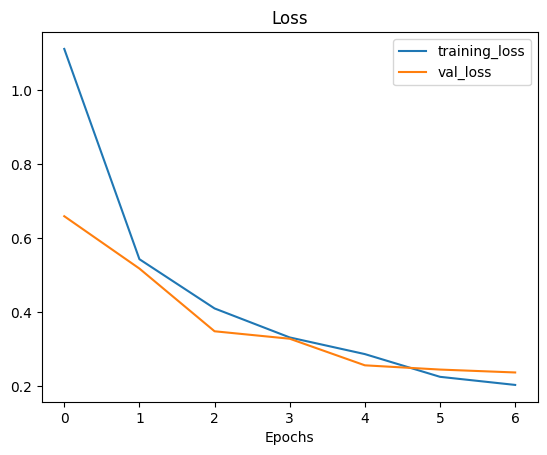

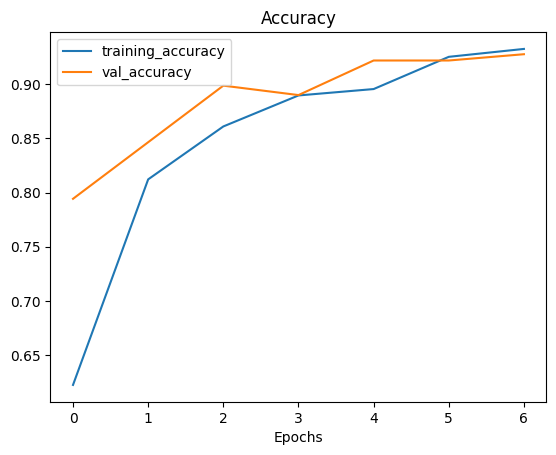

In [ ]:
plot_loss_curves(efficientnet_history)

In [ ]:
efficientnet_model.evaluate(valid_data)

11/11 [==============================] - 25s 2s/step - loss: 0.2363 - accuracy: 0.9275


[0.23629051446914673, 0.9275362491607666]

In [ ]:
pred_probs = efficientnet_model.predict(valid_data)
preds = tf.round(pred_probs)
y_preds = tf.argmax(preds, axis = 1)
print(y_preds ,"\n\n", valid_data)

11/11 [==============================] - 27s 2s/step
tf.Tensor(
[0 4 0 3 0 6 5 3 6 0 3 7 5 1 4 4 4 4 4 4 2 6 1 4 7 4 2 6 5 4 7 6 7 0 6 1 5
 7 6 4 0 4 2 1 2 1 5 4 1 3 0 7 2 1 5 2 0 1 1 6 2 3 7 1 6 1 5 4 0 0 2 0 0 0
 6 4 4 1 4 3 6 5 3 4 5 6 2 0 5 2 5 2 3 3 4 4 7 3 4 0 1 4 1 4 0 4 4 6 7 5 6
 1 1 1 0 6 4 2 0 3 0 2 4 5 5 1 0 6 6 6 5 6 6 7 0 5 7 0 0 0 5 7 5 3 3 0 1 6
 2 0 3 2 4 2 2 6 0 6 3 1 2 2 2 3 1 0 1 3 5 0 1 7 0 5 2 7 6 2 6 4 5 0 2 3 1
 1 5 0 3 3 6 6 4 5 3 1 3 5 0 6 1 4 0 0 4 5 3 7 6 4 6 3 6 3 3 5 3 6 2 3 4 7
 1 5 0 2 5 0 4 5 0 6 1 6 0 2 0 0 1 1 1 0 3 5 1 1 7 0 4 5 2 0 3 0 0 4 0 0 6
 5 6 3 7 3 3 5 0 2 1 6 7 0 7 4 7 3 4 2 7 5 7 6 5 3 1 3 5 3 7 3 6 4 0 2 4 3
 6 1 3 3 5 6 0 0 7 2 1 1 1 6 0 1 7 4 2 5 5 2 0 2 3 3 1 6 5 5 5 6 4 1 6 0 2
 2 6 1 2 4 2 5 7 2 2 7 7], shape=(345,), dtype=int64) 



In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming efficientnet_model.predict() returns the predicted labels
pred_probs = efficientnet_model.predict(valid_data)
preds = tf.round(pred_probs)
y_pred = tf.argmax(preds, axis = 1)
y_true = valid_data.labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

11/11 [==============================] - 25s 2s/step


## Using EfficientNet_V2 B0 (21k)

In [ ]:
efficientnet_v2b0_model = create_model(efficientnet_v2b0_url)
efficientnet_v2b0_model.summary()
efficientnet_v2b0_model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)
efficientnet_v2b0_history = efficientnet_v2b0_model.fit(train_data_augmented, epochs = 7,
                                  steps_per_epoch = len(train_data_augmented),
                                  validation_data = valid_data,
                                  validation_steps = len(valid_data))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             5919312   
 erasLayer)                                                      
                                                                 
 FC1 (Dense)                 (None, 100)               128100    
                                                                 
 FC2 (Dense)                 (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 8)                 808       
                                                                 
Total params: 6,058,320
Trainable params: 139,008
Non-trainable params: 5,919,312
_________________________________________________________________
Epoch 1/7
112/112 [==============================] - 352s 3s/step - loss: 1.0287 - accuracy: 0.6310 - va

### Using efficientNet v2 b3 21k finetuned on imagenet 1k

In [ ]:
efficientnet_v2b3_model = create_model(efficientnet_v2b3_url)
efficientnet_v2b3_model.summary()
efficientnet_v2b3_model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)
efficientnet_v2b3_history = efficientnet_v2b3_model.fit(train_data_augmented, epochs = 7,
                                  steps_per_epoch = len(train_data_augmented),
                                  validation_data = valid_data,
                                  validation_steps = len(valid_data))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1536)             12930622  
 erasLayer)                                                      
                                                                 
 FC1 (Dense)                 (None, 100)               153700    
                                                                 
 FC2 (Dense)                 (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 8)                 808       
                                                                 
Total params: 13,095,230
Trainable params: 164,608
Non-trainable params: 12,930,622
_________________________________________________________________
Epoch 1/7
112/112 [==============================] - 333s 3s/step - loss: 1.1014 - accuracy: 0.6169 - va

In [ ]:
efficientnet_v2b3_model.save("currency_det_efnet_v3b3_21kf1k.h5")

In [ ]:
pred_probs = efficientnet_model.predict(valid_data)
preds = tf.round(pred_probs)
y_preds = tf.argmax(preds, axis = 1)

### Using mobilenet_v3_large_100_224

In [ ]:
mobilenet_v3_url = "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5"

mobilenet_v3_model = create_model(mobilenet_v3_url)
mobilenet_v3_model.summary()
mobilenet_v3_model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)
mobilenet_v3_history = mobilenet_v3_model.fit(train_data_augmented, epochs = 7,
                                  steps_per_epoch = len(train_data_augmented),
                                  validation_data = valid_data,
                                  validation_steps = len(valid_data))


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4226432   
 erasLayer)                                                      
                                                                 
 FC1 (Dense)                 (None, 100)               128100    
                                                                 
 FC2 (Dense)                 (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 8)                 808       
                                                                 
Total params: 4,365,440
Trainable params: 139,008
Non-trainable params: 4,226,432
_________________________________________________________________
Epoch 1/7
112/112 [==============================] - 334s 3s/step - loss: 0.9173 - accuracy: 0.6862 - v

In [ ]:
mobilenet_v3_model.save("currency_det_mobilenet_v3large.h5")